Epoch 1/100
167/167 [==============================] - 2s 3ms/step - loss: 0.0048 - val_loss: 0.0015
Epoch 2/100
167/167 [==============================] - 1s 3ms/step - loss: 0.0017 - val_loss: 0.0012
Epoch 3/100
167/167 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 4/100
167/167 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 5/100
167/167 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 6/100
167/167 [==============================] - 1s 3ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 7/100
167/167 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 8/100
167/167 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 9/100
167/167 [==============================] - 1s 3ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 10/100
167/167 [==============================] - 0s 2ms/step - loss: 0.0010 - val_lo

Epoch 77/100
167/167 [==============================] - 0s 3ms/step - loss: 7.8774e-04 - val_loss: 9.2547e-04
Epoch 78/100
167/167 [==============================] - 1s 3ms/step - loss: 7.7699e-04 - val_loss: 9.5643e-04
Epoch 79/100
167/167 [==============================] - 0s 3ms/step - loss: 7.7343e-04 - val_loss: 9.3088e-04
Epoch 80/100
167/167 [==============================] - 0s 3ms/step - loss: 7.9151e-04 - val_loss: 9.2831e-04
Epoch 81/100
167/167 [==============================] - 1s 3ms/step - loss: 7.8174e-04 - val_loss: 9.7469e-04
Epoch 82/100
167/167 [==============================] - 1s 3ms/step - loss: 7.8494e-04 - val_loss: 9.1315e-04
Epoch 83/100
167/167 [==============================] - 0s 2ms/step - loss: 7.7317e-04 - val_loss: 9.1751e-04
Epoch 84/100
167/167 [==============================] - 0s 3ms/step - loss: 8.1330e-04 - val_loss: 9.1273e-04
Epoch 85/100
167/167 [==============================] - 0s 3ms/step - loss: 7.7430e-04 - val_loss: 9.1714e-04
Epoch 86/1

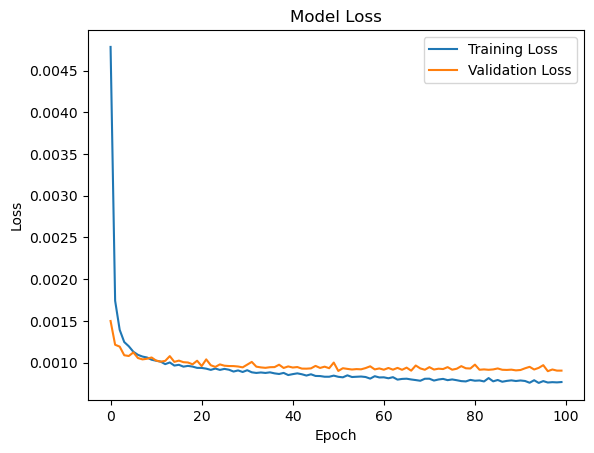

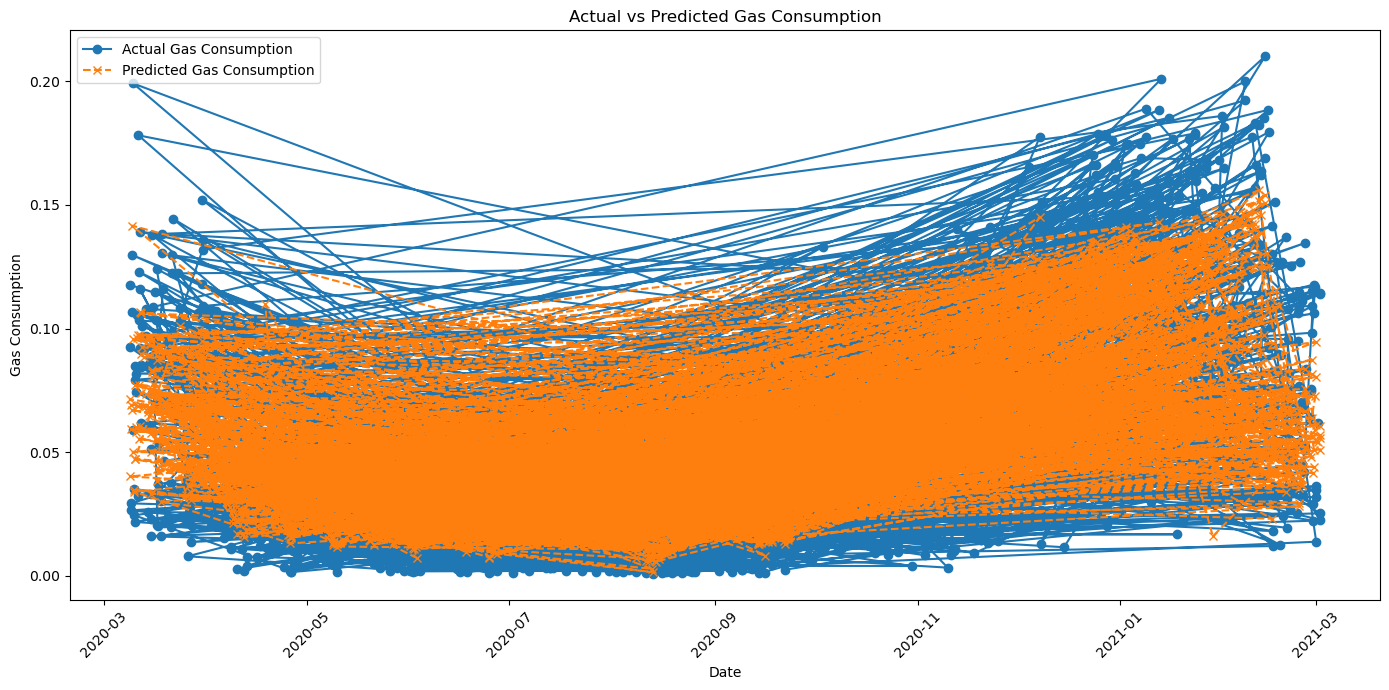

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Load your data
data = pd.read_csv('hourly_stat.csv')

# Ensure the date column is parsed as datetime
data['date'] = pd.to_datetime(data['date'])

# Drop any rows with missing values
data = data.dropna()

# Extract features and target
features = data[['SH_temp_mean', 'SH_hum_mean', 'DWH_temp_mean', 'DWH_hum_mean', 'ext_temp_mean', 'ext_hum_mean']]
target = data['Gas_mean']

# Normalize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Split data into training and testing sets
X_train, X_test, y_train, y_test, date_train, date_test = train_test_split(features_scaled, target, data['date'], test_size=0.2, random_state=42)

# Define the Deep Learning Regression model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Make predictions
predictions = model.predict(X_test).flatten()

# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')

# Plot training loss values
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot actual vs predicted gas consumption over time
plt.figure(figsize=(14, 7))
plt.plot(date_test, y_test, label='Actual Gas Consumption', marker='o')
plt.plot(date_test, predictions, label='Predicted Gas Consumption', marker='x', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Gas Consumption')
plt.title('Actual vs Predicted Gas Consumption')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [20]:
df=data
df.dtypes

date             datetime64[ns]
Gas_sum                 float64
Gas_max                 float64
Gas_min                 float64
Gas_mean                float64
ext_temp_max            float64
ext_temp_min            float64
ext_temp_mean           float64
ext_hum_max             float64
ext_hum_min             float64
ext_hum_mean            float64
SH_temp_max             float64
SH_temp_min             float64
SH_temp_mean            float64
SH_hum_max              float64
SH_hum_min              float64
SH_hum_mean             float64
DWH_temp_max            float64
DWH_temp_min            float64
DWH_temp_mean           float64
DWH_hum_max             float64
DWH_hum_min             float64
DWH_hum_mean            float64
dtype: object

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import scipy.stats as stats

In [22]:

# Load your data
df = pd.read_csv('SH_DWH_COM.csv')

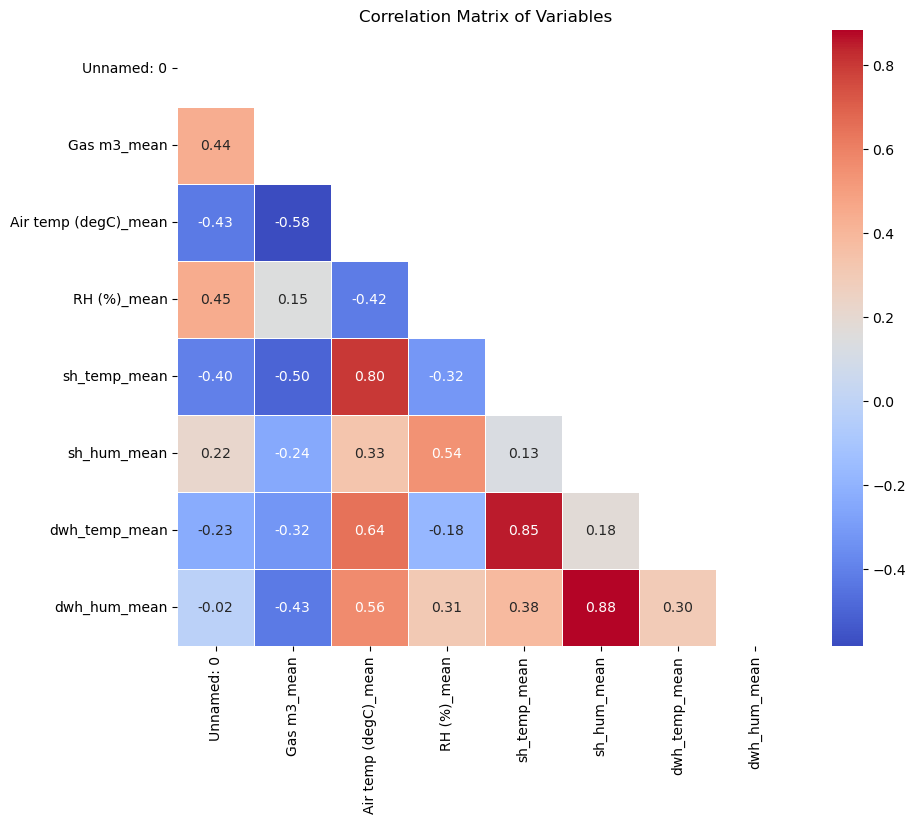

In [24]:

# Calculate the correlation matrix for the data
correlation_matrix = df.drop(columns=["date"]).corr()

# Generate a mask for the upper triangle to eliminate duplicate data due to symmetry
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)

# Adding titles and labels for clarity
plt.title('Correlation Matrix of Variables')

# Showing the plot
plt.show()